In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from simsep_v01 import column
from pyapep.simsep import column


In [11]:
N = 11
A_cros = 0.031416
L = 1
c1 = column(L,A_cros, n_component = 2,N_node = N)

## Adsorbent
isopar1 = [3.0, 1]
isopar2 = [1.0, 0.5]
def iso_fn_test(P,T):
    b1 = isopar1[1]*np.exp(30E3/8.3145*(1/T-1/300))
    b2 = isopar2[1]*np.exp(20E3/8.3145*(1/T-1/300))
    denom = 1 + b1*P[0] + b2*P[1]
    numor0 = isopar1[0]*b1*P[0]
    numor1 = isopar2[0]*b2*P[1]
    q_return = [numor0/denom, numor1/denom]
    return q_return

epsi_test = 0.4         # macroscopic void fraction (m^3/m^3)
D_particle_dia = 0.01   # particle diameter (m)
rho_s_test = 1100       # solid density (kg/mol)
c1.adsorbent_info(iso_fn_test,epsi_test,D_particle_dia, rho_s_test)

M_m_test  = [0.044, 0.028]      ## molar mass    (kg/mol)
mu_test = [1.47E-5, 1.74E-5]    ## gas viscosity (Pa sec)
c1.gas_prop_info(M_m_test, mu_test)

## Mass transfer coefficients
D_dis_test = [1E-6, 1E-6]   # m^2/sec
k_MTC = [0.0002, 0.0002]    # m/sec
a_surf = 400                # m^2/m^3
c1.mass_trans_info(k_MTC, a_surf, D_dis_test)

## Thermal properties
Del_H = [30E3, 20E3]    # J/mol
Cp_s = 935              # J/kg/K
Cp_g = [37.22, 29.15]   # J/mol/K
h_heat = 100            # J/sec/m^2/K
c1.thermal_info(Del_H,Cp_s,Cp_g,h_heat,)

## Boundary condition
Pin_test = 1.5      # inlet pressure (bar)
yin_test = [1, 0]   # inlet composition (mol/mol)
Tin_test = 300      # inlet temperature (K)
Q_in_test = 0.2*0.031416*0.3  # volumetric flowrate (m^3/sec)
Cvin_test = 1E-1    # inlet valve constant (m/sec/bar)

Pout_test = 1       # outlet pressure (bar)
Cvout_test = 2E-2   # outlet valve constant (m/sec/bar)
c1.boundaryC_info(Pout_test,Pin_test,Tin_test,yin_test,
Cvin_test,Cvout_test,Q_in_test,False)

#c1.boundaryC_info(Pout_test, Pin_test,Tin_test,yin_test,Cvin_test)

## Initial condition
P_init = 1*np.ones(N)                   # initial pressure (bar)
y_init = [0*np.ones(N), 1*np.ones(N)]   # initial composition (mol/mol)
T_init = 300*np.ones(N)                 # initial temperature (K)
q_init = iso_fn_test([P_init*y_init[0],
P_init*y_init[1]],T_init)               # initial uptake
c1.initialC_info(P_init, T_init, T_init,y_init,q_init)

## print here
print(c1)

[[Current information included here]] 
Design          : True
adsorbent_info  : True
gas_prop_info   : True
mass_trans_info : True
thermal_info    : True
boundaryC_info  : True
initialC_info   : True
Flow direction  : Foward
Assigned velocity option: False



Text(0, 0.5, 'uptake (mol/kg)')

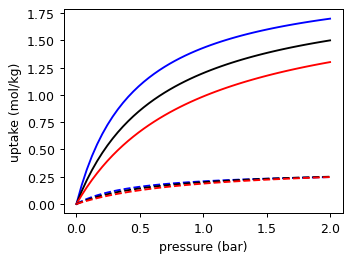

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = [4,3],dpi = 90)
P_ran_tmp = np.linspace(0,2)
q1_290, q2_290 = iso_fn_test([P_ran_tmp,P_ran_tmp],290)
q1_300, q2_300 = iso_fn_test([P_ran_tmp,P_ran_tmp],300)
q1_310, q2_310 = iso_fn_test([P_ran_tmp,P_ran_tmp],310)
#print(q1_290)
plt.plot(P_ran_tmp, q1_290,
label ='Component 1 @ T =290K',color = 'b')

plt.plot(P_ran_tmp, q1_300,
label ='Component 1 @ T =300K',color = 'k')

plt.plot(P_ran_tmp, q1_310,
label ='Component 1 @ T =310K',color = 'r')

plt.plot(P_ran_tmp, q2_290,
label ='Component 2 @ T =290K',ls = '--',color = 'b')

plt.plot(P_ran_tmp, q2_300,
label ='Component 2 @ T =300K',ls='--',color = 'k')

plt.plot(P_ran_tmp, q2_310,
label ='Component 2 @ T =310K',ls='--',color = 'r')

#plt.legend()
plt.xlabel('pressure (bar)')
plt.ylabel('uptake (mol/kg)')



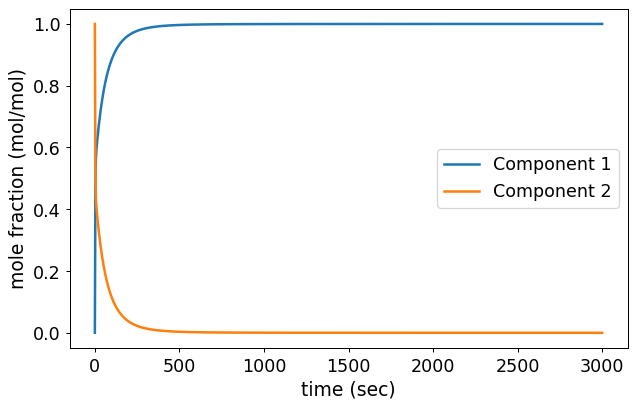

In [16]:
c1.mass_trans_info([5E-5,5E-5],400)
yres_test, zres_tset, tres_test = c1.run_mamo(3000, 10)
bt1_tmp,bt2_tmp = c1.breakthrough(True)

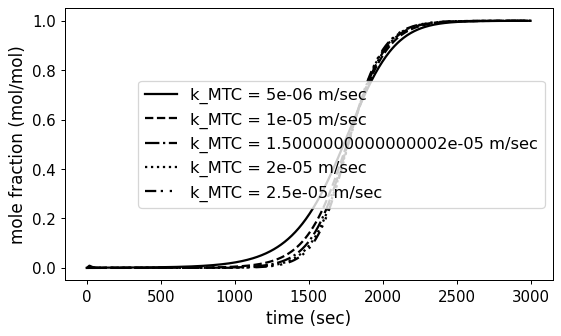

In [10]:
k1_mtc_ran = np.array([0.5,1,1.5,2,2.5])*1E-5
k2_mtc_ran = np.array([0.5,1,1.5,2,2.5])*1E-5
lstyle_list = ['-','--','-.',':', (0,( 5,2,1,3,1,3))]

#t_ran = np.linspace(0,3000,3001)
t_ran = np.linspace(0,3000,501)
bt_mass_result_list = []
plt.figure(figsize = [7,4],dpi = 90)
for kk,ll in zip(k1_mtc_ran, lstyle_list):
    c1.initialC_info(P_init, T_init, T_init,y_init,q_init)
    c1.mass_trans_info([kk, 0.0002], a_surf, [1e-8, 1e-8])
    c1.run_mamoen(t_ran[-1], 4)
    bt1_tmp,bt2_tmp = c1.breakthrough(False)
    bt1res_tmp = bt1_tmp(t_ran)
    bt_mass_result_list.append(bt1res_tmp)
    plt.plot(
        t_ran,bt1res_tmp,
        label = 'k_MTC = {0:.2e} m/sec'.format(kk),
        linewidth = 1.8,
        linestyle = ll,
        color = 'k')
plt.xlabel('time (sec)', fontsize = 13.5)
plt.ylabel('mole fraction (mol/mol)', fontsize = 13.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 13)

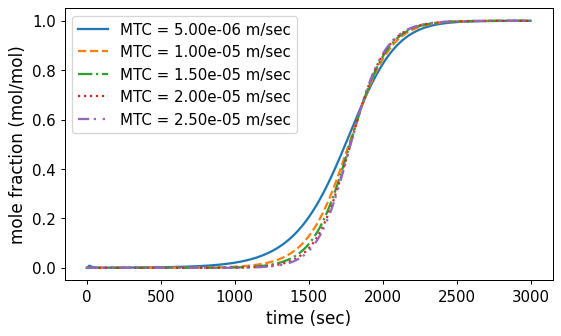

In [9]:
plt.figure(figsize = [7,4],dpi = 90)
lstyle_list = ['-','--','-.',':', (0,( 5,2,1,3,1,3))]
for btbt, ll,kk in zip(bt_mass_result_list, lstyle_list, k1_mtc_ran):    
    plt.plot(
        t_ran,btbt,
        label = 'MTC = {0:2.2e} m/sec'.format(kk),
        linewidth = 1.8,
        linestyle = ll,
        #color = 'k',
        )
plt.xlabel('time (sec)', fontsize = 13.5)
plt.ylabel('mole fraction (mol/mol)', fontsize = 13.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)


In [ ]:
h1_htc_ran = np.array([0.2, 0.4, 0.6, 0.8, 1])
h2_htc_ran = np.array([0.2, 0.4, 0.6, 0.8, 1])
lstyle_list = ['-','--','-.',':', (0,( 5,2,1,3,1,3))]

h_heat = 100            # J/sec/m^2/K

t_ran = np.linspace(0,3000,3001)
bt_heat_result_list = []
plt.figure(figsize = [7,4],dpi = 90)

c1.mass_trans_info([0.00005, 0.00005], a_surf, [1e-8, 1e-8])

for hhh,ll in zip(h1_htc_ran, lstyle_list):
    c1.initialC_info(P_init, T_init, T_init,y_init,q_init)
    c1.thermal_info(Del_H,Cp_s,Cp_g,hhh,)
    c1.run_mamoen(3000, 4)
    bt1_tmp,bt2_tmp = c1.breakthrough(False)
    bt1res_tmp = bt1_tmp(t_ran)
    bt_heat_result_list.append(bt1res_tmp)
    plt.plot(
        t_ran,bt1res_tmp,
        label = 'h_HTC = {0:2.2e} J/sec/m$^2$/K'.format(hhh),
        linewidth = 1.8,
        linestyle = ll,
        color = 'k')
plt.xlabel('time (sec)', fontsize = 13.5)
plt.ylabel('mole fraction (mol/mol)', fontsize = 13.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 13)

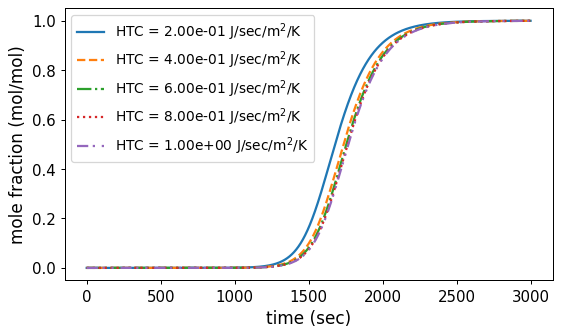

In [11]:
plt.figure(figsize = [7,4],dpi = 90)
lstyle_list = ['-','--','-.',':', (0,( 5,2,1,3,1,3))]
for btbt, ll,hhh in zip(bt_heat_result_list, lstyle_list, h1_htc_ran):    
    plt.plot(
        t_ran,btbt,
        label = 'HTC = {0:2.2e} J/sec/m$^2$/K'.format(hhh),
        linewidth = 1.8,
        linestyle = ll,
        #color = 'k',
        )
plt.xlabel('time (sec)', fontsize = 13.5)
plt.ylabel('mole fraction (mol/mol)', fontsize = 13.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 11)


In [19]:

## GEENRATE DATA
c1.initialC_info(P_init,T_init,T_init, y_init, q_init)
c1.mass_trans_info([0.00005, 0.00005], a_surf,D_dis_test)
c1.thermal_info(Del_H,Cp_s,Cp_g,0.5)
c1.run_mamoen(3000,5)
bt1_tmp, bt2_tmp = c1.breakthrough(False)

## BREAKTHROUGH FORM
t_ran = np.linspace(0,3000,6001)
bt1_dummy = bt1_tmp(t_ran)
bt2_dummy = bt2_tmp(t_ran)
bt_dummy = [bt1_dummy, bt2_dummy]

Simulation of this step is completed.
This took     0.213 mins to run. 



# Section

In [30]:
def obj_fn_bt(param, bbounds, comp_ind):
    err = 0
    for ppa, bbo in zip(param, bbounds):
        if ppa < bbo[0]:
            err=err + 1000*(ppa-bbo[0])**2
            paa = bbo[0]
        if ppa > bbo[1]:
            err=err + 1000*(ppa-bbo[1])**2
            paa = bbo[1]

    c1.initialC_info(P_init,T_init,T_init,y_init,q_init)
    k_tmp = [param[0], param[1]]
    c1.mass_trans_info(k_tmp, a_surf, D_dis_test)
    c1.thermal_info(Del_H,Cp_s, Cp_g, param[2])
    c1.run_mamoen(3000,5)
    
    bt_targ = np.array(bt_dummy)[comp_ind]
    bt_tmp = c1.breakthrough(False)
    bt_model = np.array(bt_tmp)[comp_ind]
    for btt,btm in zip(bt_targ, bt_model):
        err = err + np.sum((btm(t_ran) - btt)**2)
    return err
## TEST OBJ fn
par0_test = [0.001, 0.001, 0.1]
bound_test = [[0,0.1], [0,0.1],[0, 50]]
index_test = [True, False]
print(obj_fn_bt(par0_test,bound_test, index_test))


Simulation of this step is completed.
This took     0.411 mins to run. 

78.73470530171552


In [32]:
from scipy.optimize import minimize
from scipy.optimize import shgo
par0 = np.array([0.00001,0.00001, 0.2])
bounds = [[0,0.1],[0,0.1],[0,20]]
solvers = ['Nelder-mead', 'COBYLA']
component_indx =[True, False]
par_sol_list = []
for ss in solvers:
    par_sol_tmp = minimize(
        obj_fn_bt, par0, 
        method = ss,
        args = (bounds,component_indx)
        )
    par_sol_list.append(par_sol_tmp)
par_sol_tmp = shgo(
    obj_fn_bt, par0, 
    args = (bounds, component_indx)
    )
par_sol_list.append(par_sol_tmp)

Simulation of this step is completed.
This took     0.127 mins to run. 

Simulation of this step is completed.
This took     0.131 mins to run. 

Simulation of this step is completed.
This took     0.117 mins to run. 

Simulation of this step is completed.
This took     0.114 mins to run. 

Simulation of this step is completed.
This took     0.112 mins to run. 

Simulation of this step is completed.
This took     0.126 mins to run. 

Simulation of this step is completed.
This took     0.130 mins to run. 

Simulation of this step is completed.
This took     0.124 mins to run. 

Simulation of this step is completed.
This took     0.129 mins to run. 

Simulation of this step is completed.
This took     0.130 mins to run. 

Simulation of this step is completed.
This took     0.125 mins to run. 

Simulation of this step is completed.
This took     0.123 mins to run. 

Simulation of this step is completed.
This took     0.133 mins to run. 

Simulation of this step is completed.
This took    

TypeError: shgo() got an unexpected keyword argument 'method'

In [38]:
fnval_list = []
for optres in par_sol_list:
    fnval = optres.fun
    if np.isnan(fnval):
        fnval = 10000
    fnval_list.append(fnval)
arg_opt = np.argmin(np.array(fnval_list))
par_sol_opt = par_sol_list[arg_opt].x
print(fnval_list)
print(arg_opt)

[2.0833280071808987e-08, 10000]
0


In [39]:

c1.initialC_info(P_init,T_init,T_init,y_init,q_init)
k_tmp = [par_sol_opt[0], par_sol_opt[1]]
c1.mass_trans_info(k_tmp, a_surf, D_dis_test)
c1.thermal_info(Del_H,Cp_s, Cp_g, par_sol_opt[2])
c1.run_mamoen(3000,5)
bt_fn_opt = c1.breakthrough(False)
bt_targ_sol = np.array(bt_fn_opt)[component_indx]


Simulation of this step is completed.
This took     0.213 mins to run. 



Text(500, 0.2, 'MTC$_1$ = 4.999e-05 \nMTC$_2$ = 5.001e-05 \nHTC   = 5.000e-01')

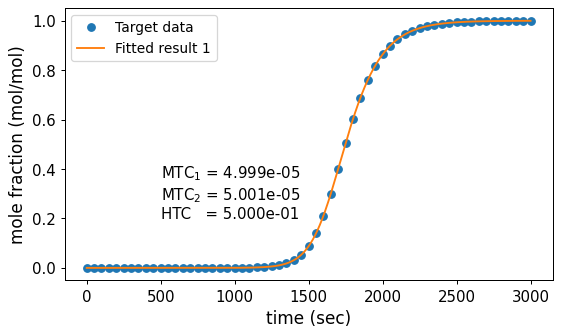

In [50]:
# Target data
plt.figure(figsize = [7,4], dpi = 90)
plt.plot(
    t_ran[::100], bt_dummy[0][::100],
     'o',label = 'Target data')

btres_opt_list = []
ii = 1
for btbt in bt_targ_sol:
    btres_tmp = btbt(t_ran)
    plt.plot(t_ran,btres_tmp, label = 'Fitted result {}'.format(ii))
    btres_opt_list.append(btres_tmp)
    ii = ii+1

plt.xlabel('time (sec)', fontsize = 13.5)
plt.ylabel('mole fraction (mol/mol)', fontsize = 13.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 11)
plt.text(500,0.2,
    'MTC$_1$ = {0:2.3e} \nMTC$_2$ = {1:2.3e} \nHTC   = {2:2.3e}'.format(
        par_sol_opt[0], par_sol_opt[1], par_sol_opt[2]),
        fontsize = 12
    )